### Data Cleaning

In [1]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import os

def get_images(directory):
    """
    Returns a list of image paths in the given directory.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - List of image paths.
    """
    images = []

    # Iterate through each file in the directory
    for image_file in sorted(os.listdir(directory)):
        # Check if the file has a valid image extension
        if image_file.endswith(('.jpg', '.jpeg')):
            # Create the full path to the image
            image_path = os.path.join(directory, image_file)
            # Add the image path to the list
            images.append(image_path)

    return images

In [2]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

def get_labels(image_paths):
    """
    Returns a list of labels based on the given image paths.

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - List of corresponding labels.
    """
    # Define ranges for each person's images
    label_ranges = {
        0: range(1, 2501),  # Edith
        1: range(2501, 5001),  # Noni
        2: range(5001, 7501),  # Aroma
        3: range(7501, 10001)  # Macbeth
    }

    labels = []

    # Extract image numbers from image paths and determine labels
    for image_path in image_paths:
        # Extract the image number from the filename
        image_number = int(os.path.splitext(os.path.basename(image_path))[0])

        # Determine the label based on the image number
        person_label = None
        for person, number_range in label_ranges.items():
            if image_number in number_range:
                person_label = person
                break

        # If the image number doesn't fall into any range, skip it
        if person_label is not None:
            labels.append(person_label)

    return labels

In [3]:
import os
import shutil

# Function to move files within specified ranges
def move_files_within_ranges(src_dir, dest_dir, ranges):
    """
    Move files from the source directory to the destination directory based on specified ranges.

    Parameters:
    - src_dir (str): The source directory containing the files to be moved.
    - dest_dir (str): The destination directory where the files will be moved to.
    - ranges (list of tuples): A list of tuples representing the inclusive ranges of file indices to be moved.
      Each tuple should contain two integers, indicating the start and end indices of the range.

    Returns:
    - None
    """
    for start, end in ranges:
        for i in range(start, end + 1):
            file_name = f"{i:04d}.jpg" 
            # source path to image
            src_path = os.path.join(src_dir, file_name)
            # destination path for image
            dest_path = os.path.join(dest_dir, file_name)
            shutil.move(src_path, dest_path)
            print(f"Moved {file_name} to {dest_dir}")

In [5]:
# Set the source and destination directories
images_directory = "/Users/edithngundi/Downloads/FacesImages"

# Destination directory for simpleCNN dataset
short_dataset5 = "/Users/edithngundi/Downloads/shorter_dataset5"
# Image name ranges for ensemble dataset
ranges_to_move5 = [(2001, 2500), (4501, 5000), (7001, 7500), (9501, 10000)]

In [ ]:
# Create shorter_dataset5 locally
os.makedirs(short_dataset5, exist_ok=True)
# Move files within specified ranges
move_files_within_ranges(images_directory, short_dataset5, ranges_to_move5)

In [7]:
# Set up variables for shorter_dataset5
images_directory5 = "/Users/edithngundi/Downloads/shorter_dataset5"
image_paths5 = get_images(images_directory5)
image_labels5 = get_labels(image_paths5)

### Data Conversion and Pre-processing

In [8]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np
import pandas as pd

def create_dataframe(directory):
    """
    Creates a dataframe of the image paths and their corresponding labels.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - Dataframe of the images.
    """
    # Get image paths and labels using helper functions
    image_paths = get_images(directory)
    labels = get_labels(image_paths)

    # Create a dataframe
    dataframe = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    }, index=np.arange(1, len(image_paths) + 1))

    return dataframe

# Create the Dataframe5
df5 = create_dataframe(images_directory5)
df5

,image_path,label
1,/Users/edithngundi/Downloads/shorter_dataset5/...,3
2,/Users/edithngundi/Downloads/shorter_dataset5/...,0
3,/Users/edithngundi/Downloads/shorter_dataset5/...,0
4,/Users/edithngundi/Downloads/shorter_dataset5/...,0
5,/Users/edithngundi/Downloads/shorter_dataset5/...,0
...,...,...
1996,/Users/edithngundi/Downloads/shorter_dataset5/...,3
1997,/Users/edithngundi/Downloads/shorter_dataset5/...,3
1998,/Users/edithngundi/Downloads/shorter_dataset5/...,3
1999,/Users/edithngundi/Downloads/shorter_dataset5/...,3


In [9]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import cv2

def preprocess_images(directory, target_size):
    """
    Preprocess images from a list of file paths.

    Parameters:
    - directory: Directory to the images.
    - target_size: Tuple representing the desired size of the images (height, width).

    Returns:
    - List of preprocessed images.
    """

    # List to store preprocessed_images
    preprocessed_images = []

    # Initialize variables for mean and standard deviation calculation
    mean_sum = np.zeros(3)
    std_sum = np.zeros(3)
    count = 0

    # Get image paths
    image_paths = get_images(directory)

    # Iterate through image paths
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)
        # Check if the image is readable
        if image is None:
            print(f"Error reading image: {image_path}")
            continue  # Skip to the next iteration
        # Check if there is an image
        if image.size == 0:
            print(f"Error: Empty image - {image_path}")
            continue  # Skip to the next iteration
        # Resize the image
        image = cv2.resize(image, target_size)
        # Add the resized images to the list
        preprocessed_images.append(image)

        # Accumulate sums for mean and standard deviation
        mean_sum += np.mean(image, axis=(0, 1))
        std_sum += np.std(image, axis=(0, 1))
        count += 1
    # Calculate the mean and standard deviation
    dataset_mean = mean_sum / count
    dataset_std = std_sum / count

    return preprocessed_images, dataset_mean, dataset_std

# ideal size for the pre-trained models
target_size = (224, 224)

In [10]:
# Preprocessed images from shorter_dataset5
preprocessed_images5, mean5, std5 = preprocess_images(images_directory5, target_size)

In [11]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np

# Function to normalize a list of images
def normalize_images(preprocessed_images, mean, std):
    """
    Normalize a list of images by scaling pixel values to the range [0, 1].

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - NumPy array of normalized images.
    """
    normalized_images = []
    for image in preprocessed_images:
        # Convert the image to a NumPy array and normalize pixel values
        normalized_image = (image - mean) / std
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

### Simple CNN Model

In [12]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

from sklearn.model_selection import train_test_split

# Normalized images
image_data5 = normalize_images(preprocessed_images5, mean5, std5)

# Initial split for testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data5, df5['label'], test_size=0.2, random_state=42, stratify=df5['label'])

# Further split the remaining 80% for training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [ ]:
# Code adapted from Analytics Vidhya by Devansh Sharma — Updated On June 14th, 2023
# Step 8: Define, Compile and Train the CNN Model
# Code adapted from Analytics Vidhya by Mohdsanadzakirizvi@gmail.com Sanad — Updated On July 11th, 2023

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Training data batch size
batch_size = 64
# Number of classes
classes = 4
# Number of epochs
epochs = 15
# Image channel 
rgb = 3
# Number of output filters in the convolution
filters = 32
# Window size over which the maximum is taken
pool_size = (2, 2)
# Specifies the height and width of the 2D convolution window
kernel_size = (3, 3)
# Pads with zeros evenly to the left/right or up/down of the input
padding = 'same'
# Fraction of the input units to drop
rate = 0.5

# CNN Model
model_simpleCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding=padding, activation='relu', input_shape=(target_size[0], target_size[1], rgb)), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size), # down-samples the spatial dimensions of the input data
    tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding=padding, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size), 
    tf.keras.layers.Dropout(rate), # drop input units
    tf.keras.layers.Flatten(), # flatten the output of the previous layers
    tf.keras.layers.Dense(units=128, activation='relu'), # hidden layer fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(units=classes, activation='softmax') # output layer
])

# Compile the model
model_simpleCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_simpleCNN.summary()

# Define callbacks
checkpoint_simpleCNN = ModelCheckpoint('simple_cnn_best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history_simpleCNN = model_simpleCNN.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint_simpleCNN])

# Evaluate the model on the test set
test_loss, test_accuracy = model_simpleCNN.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# You can load the best weights back to the model
model_simpleCNN.load_weights('simple_cnn_best_model.h5')


### Simple CNN Performance Evaluation and Visualization

In [21]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Evaluate the model on the test set
predictions_test = model_simpleCNN.predict(X_test)
y_pred_classes_test = tf.argmax(predictions_test, axis=-1).numpy()

# Convert true labels to one-hot encoding
y_true_one_hot_test = tf.one_hot(y_test, depth=classes)

# Calculate precision and recall on the test set
precision_test = precision_score(y_test, y_pred_classes_test, average='weighted')
recall_test = recall_score(y_test, y_pred_classes_test, average='weighted')

print(f"Precision on Test Set: {precision_test * 100:.2f}%")
print(f"Recall on Test Set: {recall_test * 100:.2f}%")

13/13 [==============================] - 2s 160ms/step
Precision on Test Set: 91.87%
Recall on Test Set: 91.75%


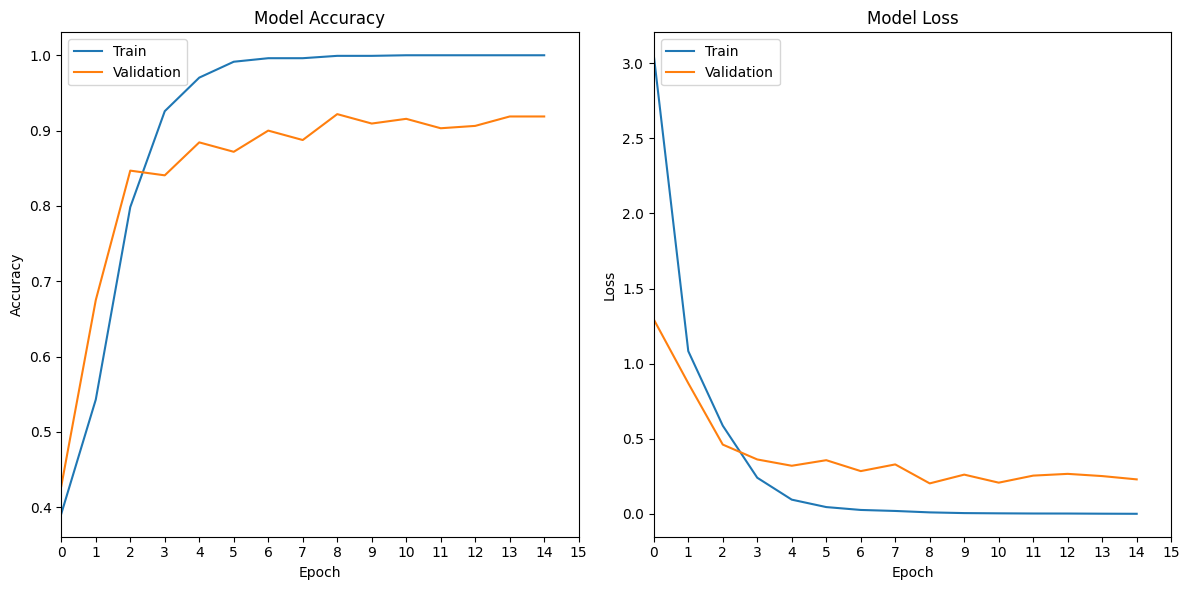

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['accuracy']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(history.history['loss']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['loss']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# plot the vgg19 model history
plot_history(history_simpleCNN)

### Simple CNN Predictions

13/13 [==============================] - 2s 164ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


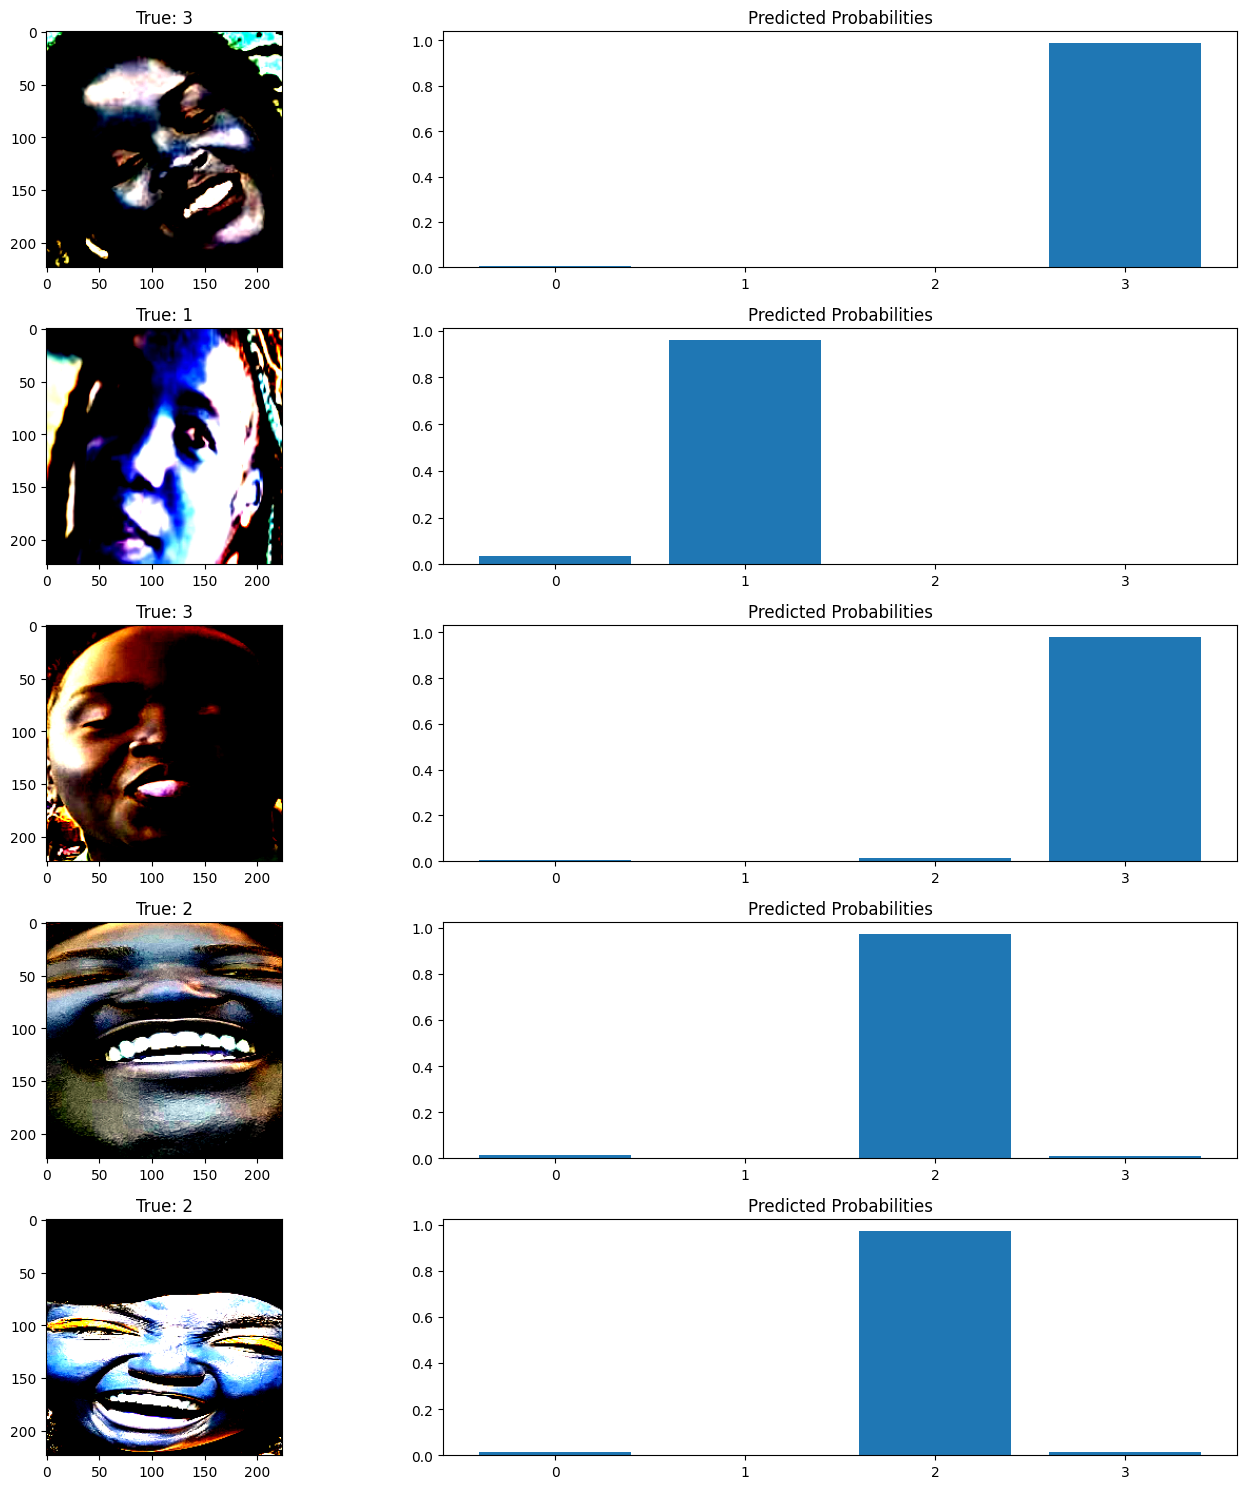

In [61]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test, num_samples=5):
    # Generate predictions
    y_pred = model.predict(X_test)

    # Randomly select num_samples samples
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

    plt.figure(figsize=(15, 3 * num_samples))

    for i, sample_index in enumerate(sample_indices, 1):
        plt.subplot(num_samples, 2, 2 * i - 1)
        plt.imshow(X_test[sample_index])
        plt.title(f"True: {y_test[sample_index]}")

        plt.subplot(num_samples, 2, 2 * i)
        plt.bar(range(classes), y_pred[sample_index], tick_label=range(classes))
        plt.title("Predicted Probabilities")

    plt.tight_layout()
    plt.show()

# y_test is a pandas DataFrame
y_test_array = y_test.values 

# Now y_test_array is a NumPy array or list
visualize_predictions(model_simpleCNN, X_test, y_test_array)